<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 2

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm
    

    
## Andrew Gillock apg2255

## Benjamin Kanarick bjk2437

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

# Answer : 

- a)
Model bias depends on the prediction accuracy of the model. Generally, the more complex the model gets, the lower the bias gets, and the reverse holds when model complexity decreases. Furthermore, if a model is underfit this is an indication that the model is very high bias. Model bias is not dependent on if we have more data or not, for the bias curve does not change with the addition of data to the model.
The bias of a point estimator is the difference between the expected value of the estimator and the value obtained in the model. If the expected value is equivalent to the value obtained, then the point is considered unbiased. Furthermore, if the values do not equal one another, the closer the expected value is to the parameter being measured, the less bias present.

- b)
A learning curve is a plot of model learning performance over experience or time and they are a crucial tool for algos that incrementally learn from a training set. When using a learning curve to determine if a model is overfit, we look at the accuracy and loss values first. If a model is overfit, then adding further training data might improve the performance on unseen data. To spot overfitting, these validation metrics usually increase until a point where they plateau or decline due to the start of overfitting and following the data too much. As for underfitting, it is detected if the model is performing poorly on the current training set given. Due to this inability by the model to capture the true relationship between the input and output variables, we tend to see a high error rate on the learning curve for both the training and test sets.

# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

In [42]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [43]:
data_load = np.load('./data.npy', allow_pickle = True)

In [44]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()
degrees = np.array([2, 4, 7])


Degree Polynomial: 2
Train RMSE:  15.726
Test RMSE:  17.89


Degree Polynomial: 4
Train RMSE:  5.632
Test RMSE:  5.594


Degree Polynomial: 7
Train RMSE:  5.539
Test RMSE:  5.78



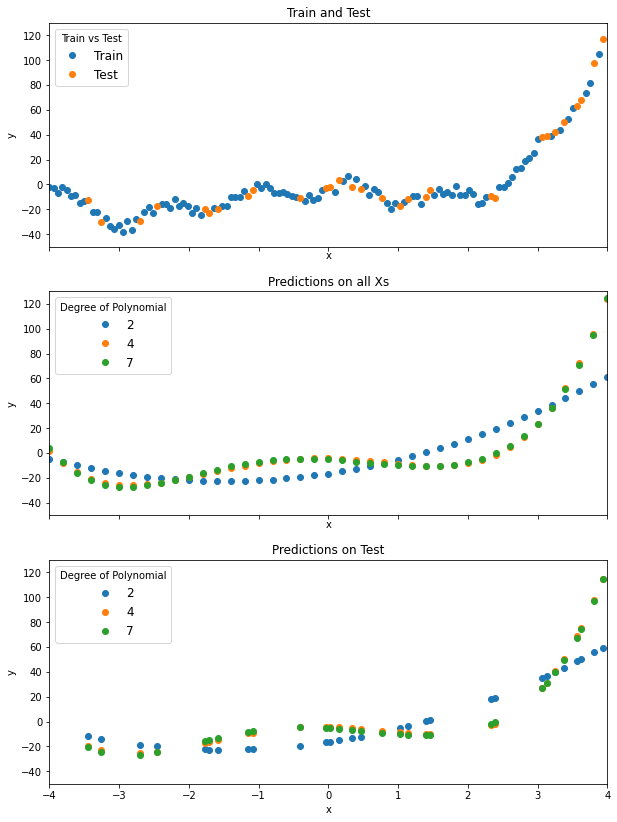

In [45]:
def plot_curves(x_train, y_train, x_test, y_test):
    
    train_rmses = []
    test_rmses = []
    
    fig, axs = plt.subplots(3, sharex = True, sharey = True, figsize = (10, 14))
    axs[0].plot(x_train, y_train, 'o', label = 'Train')
    axs[0].plot(x_test, y_test, 'o', label = 'Test')
    axs[0].set_title('Train and Test', fontsize = 12)
    axs[0].set(xlabel = 'x', ylabel = 'y')
    axs[0].legend(loc = 'best', title = 'Train vs Test', fontsize = 12)
    
    for i in degrees:

        # fit ith  polynomial on training data
        poly_train = np.vander(np.squeeze(x_train), i + 1)
        lrp.fit(poly_train, y_train)

        # predict on training data
        y_pred_train = lrp.predict(poly_train)
        RMSE_train = mean_squared_error(y_pred_train, y_train, squared = False)
        train_rmses.append(RMSE_train)
        print()
        print('Degree Polynomial:', i)
        print('Train RMSE: ', round(RMSE_train, 3))

        # predict on all x values
        poly_all = np.vander(np.squeeze(x_all), i + 1)
        y_pred_all = lrp.predict(poly_all)

        # plot pred on x_all v x_all
        axs[1].plot(x_all, y_pred_all, 'o', label = i)
        axs[1].legend(loc = 'best', title = 'Degree of Polynomial', fontsize = 12)
        axs[1].set_title('Predictions on all Xs', fontsize = 12)
        axs[1].set_ylim([-50, 130])
        axs[1].set_xlim([-4, 4])
        axs[1].set(xlabel = 'x', ylabel = 'y')

        # predict on testing data
        poly_test = np.vander(np.squeeze(x_test), i + 1)
        y_pred_test = lrp.predict(poly_test)
        RMSE_test = mean_squared_error(y_pred_test, y_test, squared = False)
        test_rmses.append(RMSE_test)
        print('Test RMSE: ', round(RMSE_test, 3))
        print()

        # plot pred on x_test v x_test
        axs[2].plot(x_test, y_pred_test, 'o', label = i)
        axs[2].legend(loc = 'best', title = 'Degree of Polynomial', fontsize = 12)
        axs[2].set_title('Predictions on Test')
        axs[2].set(xlabel = 'x', ylabel = 'y')
    
    plt.show()
    return train_rmses, test_rmses

# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

20% data

Degree Polynomial: 2
Train RMSE:  12.695
Test RMSE:  20.058


Degree Polynomial: 4
Train RMSE:  5.926
Test RMSE:  6.192


Degree Polynomial: 7
Train RMSE:  4.748
Test RMSE:  11.628



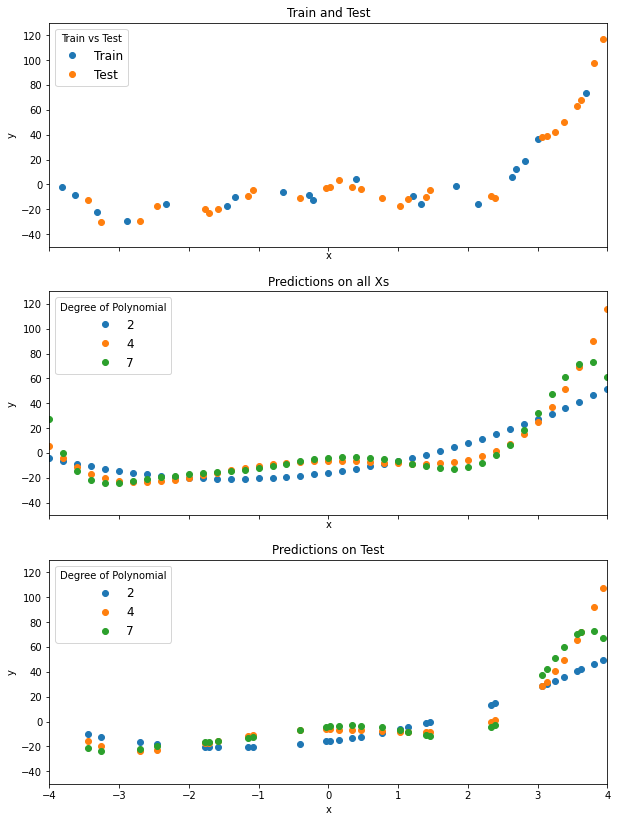

40% data

Degree Polynomial: 2
Train RMSE:  12.261
Test RMSE:  20.145


Degree Polynomial: 4
Train RMSE:  5.624
Test RMSE:  5.759


Degree Polynomial: 7
Train RMSE:  5.049
Test RMSE:  7.825



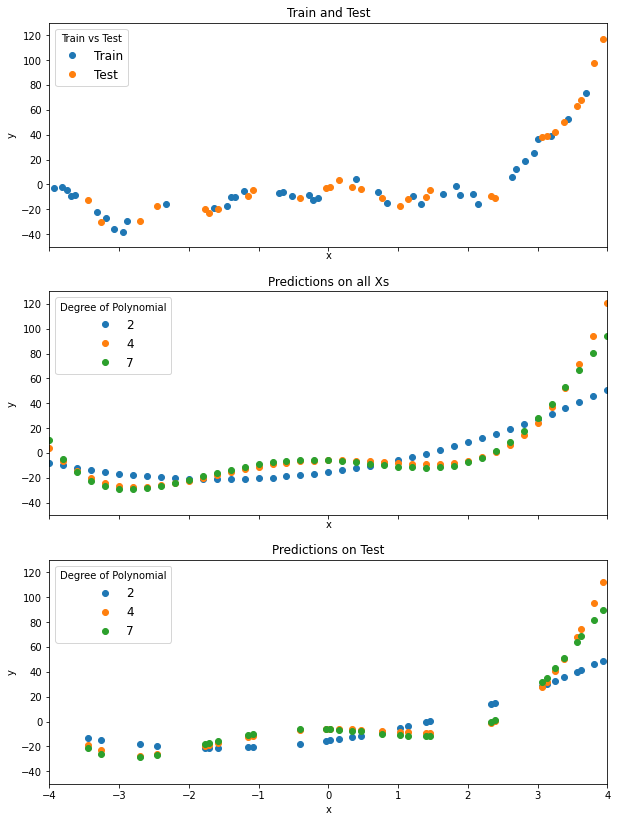

60% data

Degree Polynomial: 2
Train RMSE:  12.251
Test RMSE:  20.081


Degree Polynomial: 4
Train RMSE:  5.403
Test RMSE:  5.638


Degree Polynomial: 7
Train RMSE:  5.109
Test RMSE:  7.757



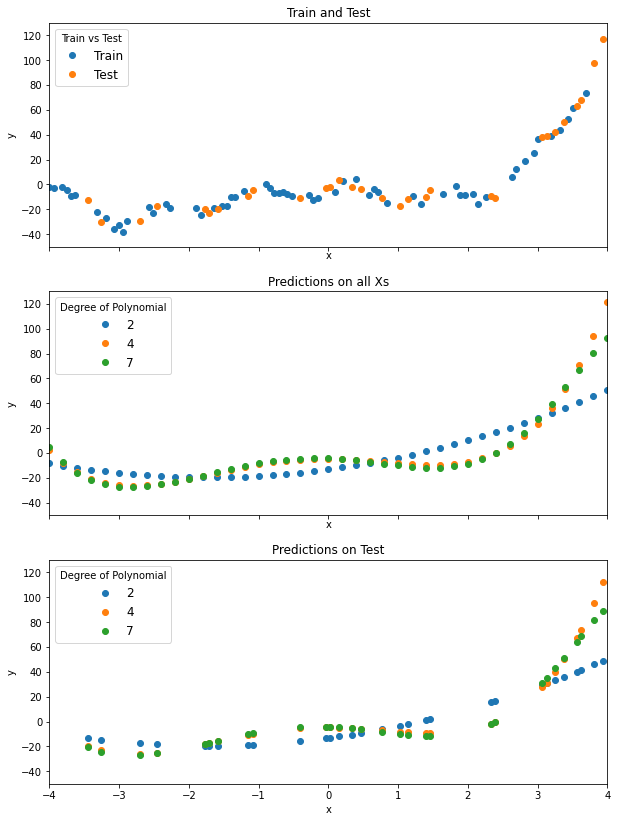

80% data

Degree Polynomial: 2
Train RMSE:  12.966
Test RMSE:  20.189


Degree Polynomial: 4
Train RMSE:  5.413
Test RMSE:  5.702


Degree Polynomial: 7
Train RMSE:  5.153
Test RMSE:  6.934



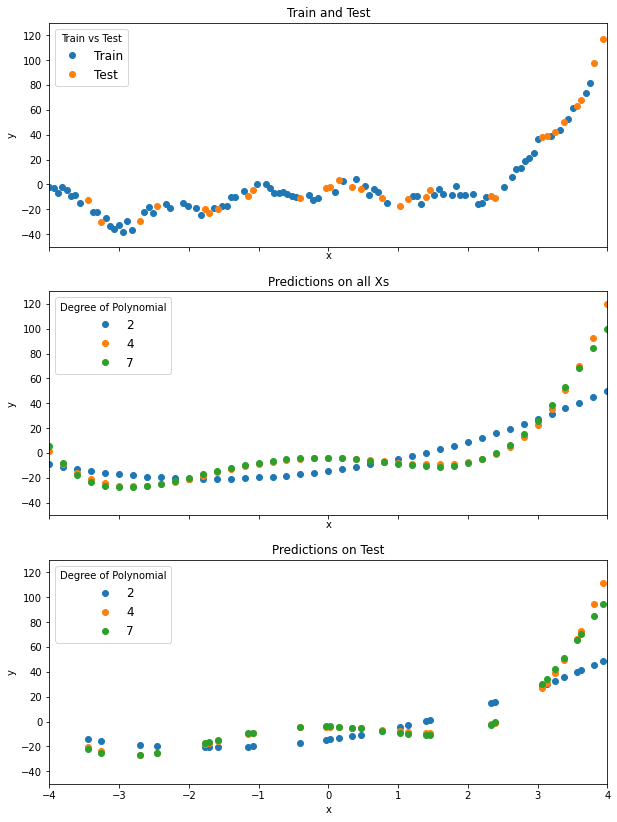

100% data

Degree Polynomial: 2
Train RMSE:  15.726
Test RMSE:  17.89


Degree Polynomial: 4
Train RMSE:  5.632
Test RMSE:  5.594


Degree Polynomial: 7
Train RMSE:  5.539
Test RMSE:  5.78



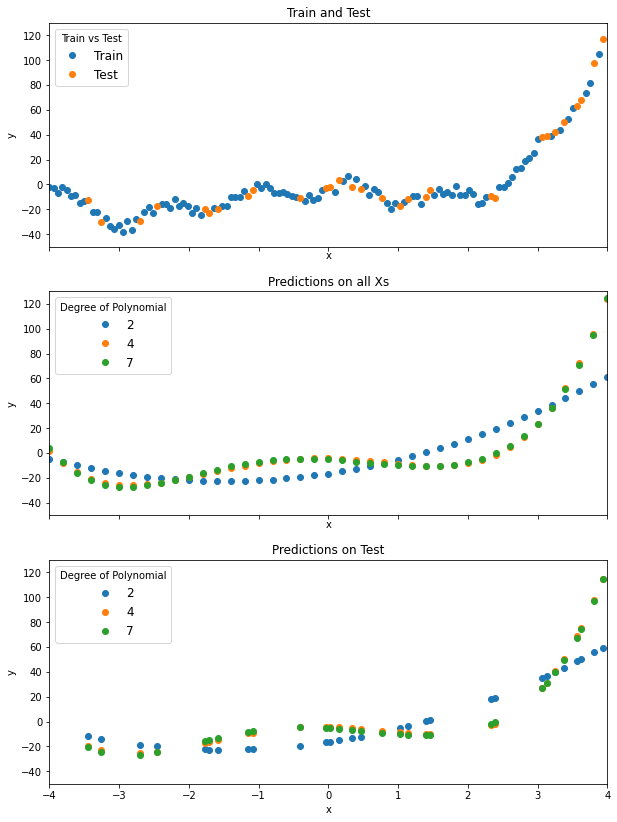

In [46]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

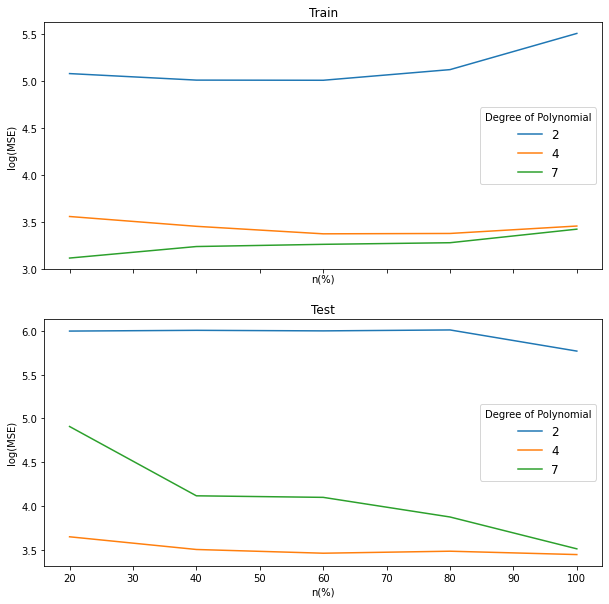

In [47]:
sizes = [20, 40, 60, 80, 100]
models = [0, 1, 2]

fig2, axs2 = plt.subplots(2, sharex = True, figsize = (10, 10))

for i in models:
    
        # add 1st value in each array to a list for plotting
        trains = [train_rmses_20[i], train_rmses_40[i], train_rmses_60[i], train_rmses_80[i], train_rmses_100[i]]
        tests = [test_rmses_20[i], test_rmses_40[i], test_rmses_60[i], test_rmses_80[i], test_rmses_100[i]]
        
        # convert to log(MSE)
        mse_train = np.log(np.square(trains))
        mse_test = np.log(np.square(tests))
        
        axs2[0].plot(sizes, mse_train, label = degrees[i])
        axs2[0].legend(loc = 'best', title = 'Degree of Polynomial', fontsize = 12)
        axs2[0].set(xlabel = 'n(%)', ylabel = 'log(MSE)', title = 'Train')
        
        axs2[1].plot(sizes, mse_test, label = degrees[i])
        axs2[1].set_title('Test')
        axs2[1].legend(loc = 'best', title = 'Degree of Polynomial', fontsize = 12)
        axs2[1].set(xlabel = 'n(%)', ylabel = 'log(MSE)', title = 'Test')


# Answer : 

- b) 
Before examining the outputted graphs, we can consider the model performance on both training and testing sets. The 7th
order polynomial has the lowest root mean squared error on the training data, but it increases when evaluated on the testing data 
(an indication of overfitting). Since the model is more complex than the previous two, it has the highest variance among all models. 
Alternatively, the 2nd degree polynomial has large test/train RMSE values (likely the result of an oversimplified model that does not 
closely follow the training data and is hence biased). This means we should utilize the 4th order polynomial because although it didn't 
achieve the lowest train RMSE, it performed best on the test data. Ultimately, this model has the best balance between bias and variance.

- c)
In the training data, MSE remains relatively constant for each model as the amount of data included in the model increases. The 2nd 
order polynomial increase in MSE is evident of the bias in the model. In the testing data, the 2nd and 4th degree polynomials have relatively 
constant MSE as the amount of data included increases. The 7th degree model decreases in MSE the most of all models within the training and 
testing data, a result of its complexity and overfitting. We know that the 4th order polynomial has the most flexibility in terms of 
bias-variance tradeoff, which could explain the constant MSE for each dataset. MSE in the training set is overall lower for each model 
when compared to the testing set due to the difference in *n*.

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 

# Answer : 

- 1.
Momentum leads to a faster convergence of the loss function compared to the standard gradient descent algorithm because descent with momentum is to calculate the weighted average of our gradients, then update our weights accordingly. From class, we were taught that the higher the learning rate, the higher chance of oscillation and continuous movement around / away from the minima, slowing our descent and overall goal. If we use momentum (and weight the oscillations towards some average), we see a minimization in vertical oscillation, leading us to a much faster and direct approach to finding the optima. In this case with momentum, the algorithm can take more of a direct path to the optima and not be prone to as many vertical oscillations.

- 2.
Mini-batch Stochastic Gradient Descent is a subset of the GSD algo that divides the training set into small 'batches' that are then used to calculate the error and update the coefficients of the model. One key advantage of Mini-batch SGD is that the model updates at a higher frequency than tradition Batch gradient descent, meaning that we only pass a portion of the data through the model then seeking optimization. These batches provide a much more computationally efficient process when compared to SGD and allows us to not always have all of the training data stored in memory. This allows us to take in live ('stream') data and alter our algorithm accordingly, as well as control memory consumption in order to store losses for all datasets.

# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 


2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [82]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef + (self.learning_rate * gradient)
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                
                # Calculate errors
                error_n = y[i] - self.linearPredict(X[i])                

                # Compute gradients
                gradient = (2 * error_n * X[i]) + (self.regularization * self.coef)
                
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        #compute the dot product of self.coef and X
        dot_prod = np.dot(X, self.coef)
        return dot_prod 

In [83]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

# Answer :

Learning Rate:  0.001
Regularization:  0
MSE:  0.028842167362254173


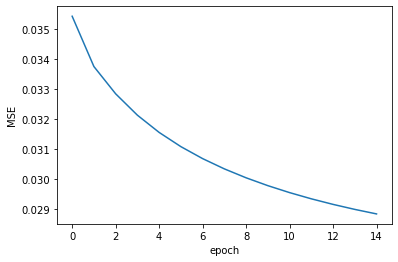

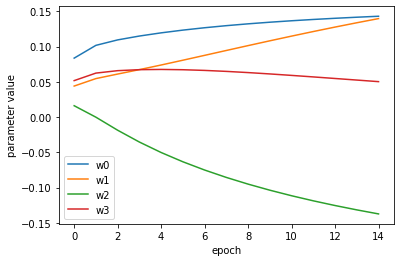

Learning Rate:  0.01
Regularization:  0
MSE:  0.027444548002430152


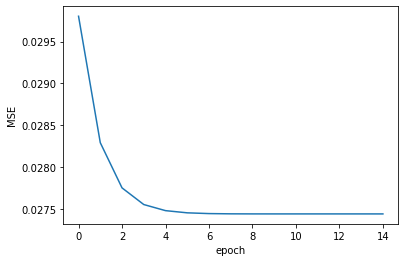

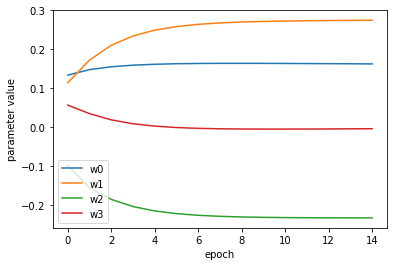

In [84]:
# lowest = 0

for i in learning_rate:
    
    for j in regularization:
        
        reg_obj = Regression(i, j, n_epochs)

        
### The below code is to determine the lowest mse from each iteration of the model

#         print('Learning Rate: ', i)
#         print('Regularization: ', j)
#         reg_obj.fit(X, y, plot = True)
#         mse = reg_obj.lowest_mse        
#         print('MSE: ', mse)
#         print()

#         # keep track of lowest MSE
#         if i == learning_rate[0]:
            
#             lowest = mse
        
#         elif mse < lowest:
            
#             lowest = mse
# print(lowest)
        
    
        if i == 0.01 and j == 0:
            reg_obj.fit(X, y, plot = True)
            mse = reg_obj.lowest_mse
            print('Learning Rate: ', i)
            print('Regularization: ', j)
            print('MSE: ', mse)
            plt.show()
            
        if i == 0.001 and j == 0:
            reg_obj.fit(X, y, plot = True)
            mse = reg_obj.lowest_mse
            print('Learning Rate: ', i)
            print('Regularization: ', j)
            print('MSE: ', mse)
            plt.show()
                